# Face Recognition with Olivetti Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
data = np.load('../data/olivetti_faces.npy')
target_data = np.load('../data/olivetti_faces_target.npy')

print(f"Data shape: {data.shape}")
print(f"The dataset has {data.shape[0]} images")
print(f"Each image has a size of {data.shape[1]}x{data.shape[2]}")

Data shape: (400, 64, 64)
The dataset has 400 images
Each image has a size of 64x64


### See how make different faces the target data have

In [3]:
print(f"The target dataset has {len(np.unique(target_data))} differents faces")
print(f"The names of the faces are {np.unique(target_data)}")
print(f"Target data shape: {target_data.shape}")

The target dataset has 40 differents faces
The names of the faces are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Target data shape: (400,)


### Get 6 random people face from the data

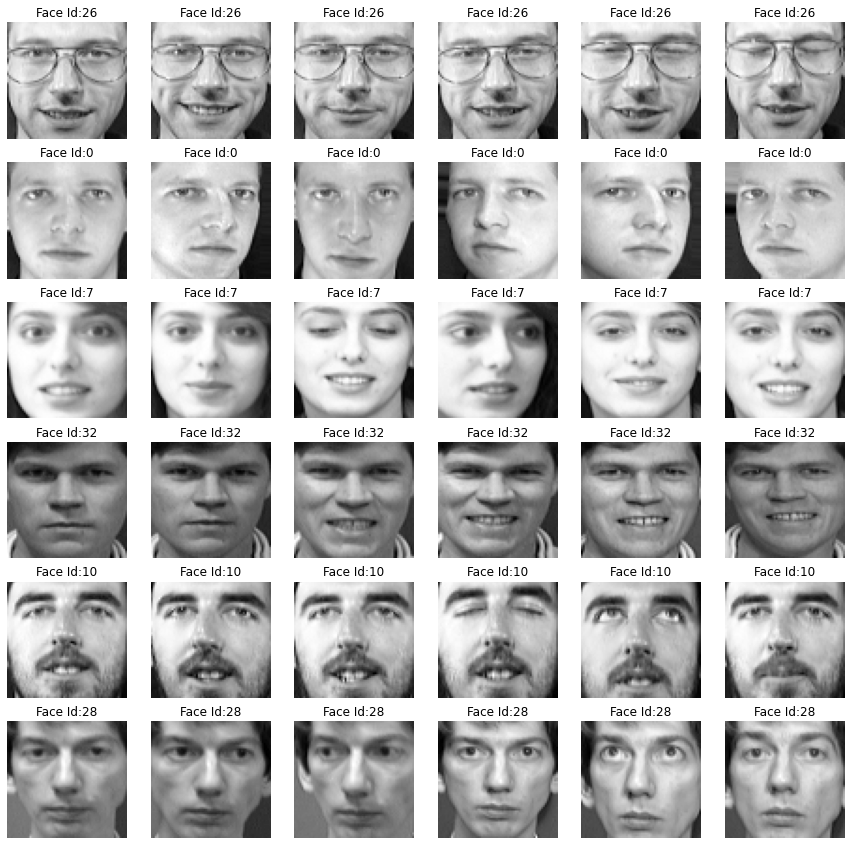

In [4]:
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

# get 6 random different faces
face_id = random.sample(range(0,40), rows)

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

### Get all the target faces from the data

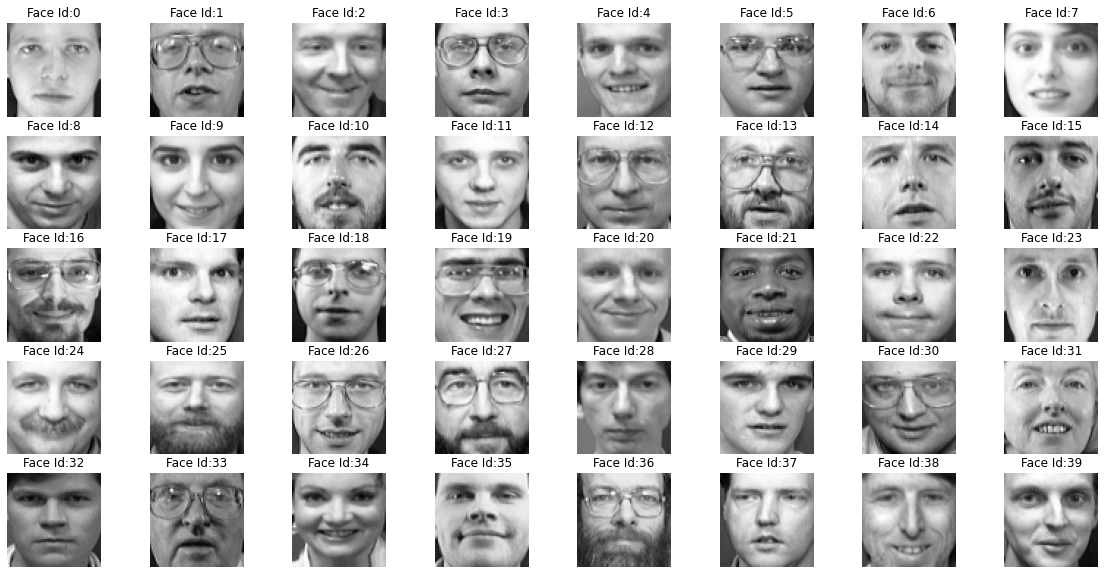

In [5]:
fig, axarr=plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
axarr=axarr.flatten()

#iterating over user ids
for i in range(40):
    image_index=i * 10
    axarr[i].imshow(data[image_index], cmap="gray")
    axarr[i].set_title("Face Id:{}".format(i))
    axarr[i].axis("off")

### Correlation Matrices

(400, 400)


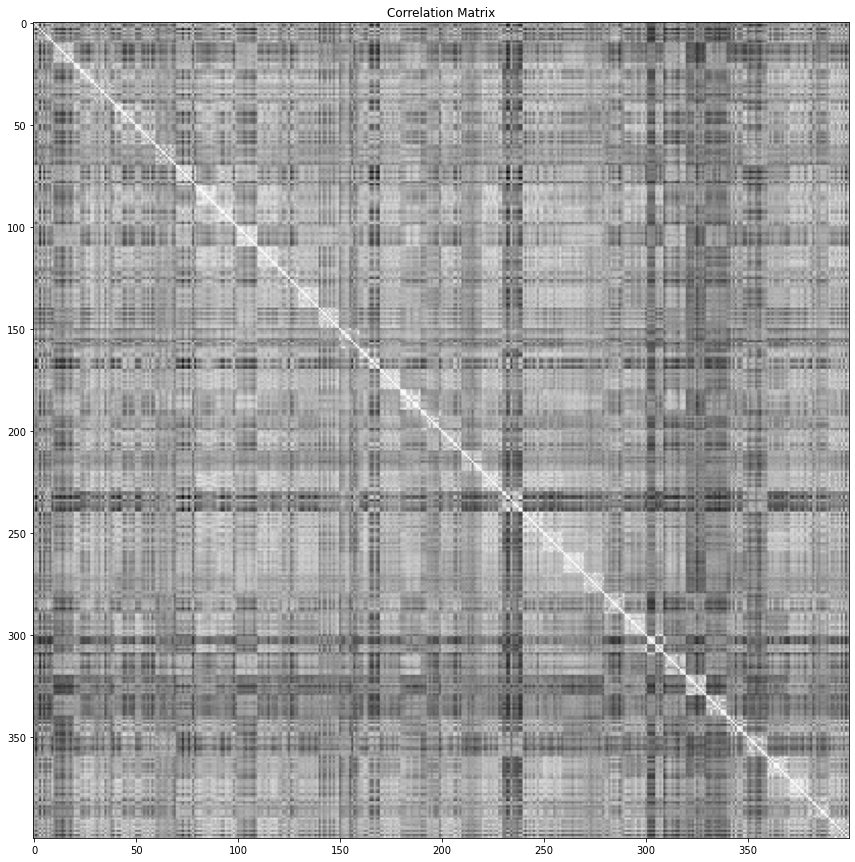

In [6]:
corr = np.corrcoef(data.reshape(400,4096))
print(corr.shape)

fig, ax=plt.subplots(figsize=(15,15))
ax.imshow(corr, cmap="gray")
ax.set_title("Correlation Matrix")
plt.show()

### Split Data into Train and Test

Convert matrix form (image data) to a vector 

In [7]:
data = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print(f"Data shape: {data.shape}")

Data shape: (400, 4096)


In [8]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target_data, test_size=0.2, stratify=target_data)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


### Normalization

In [9]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

### Distribuiton of the dataset


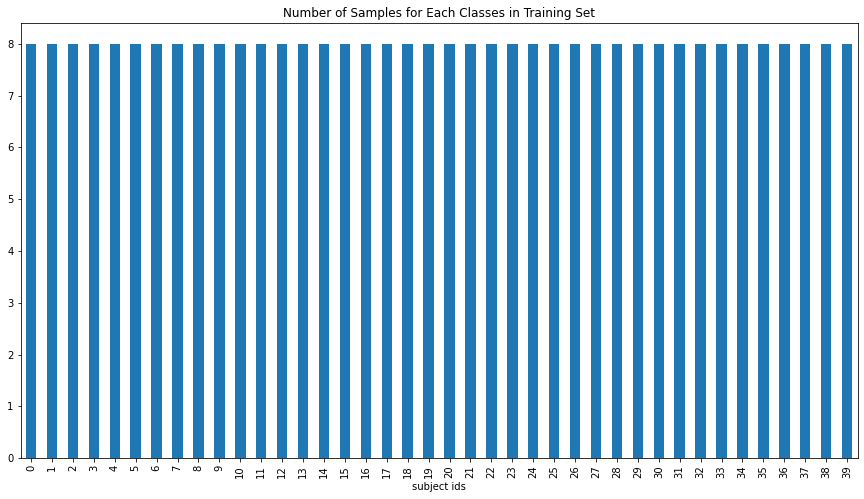

In [11]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes in Training Set")
plt.show()

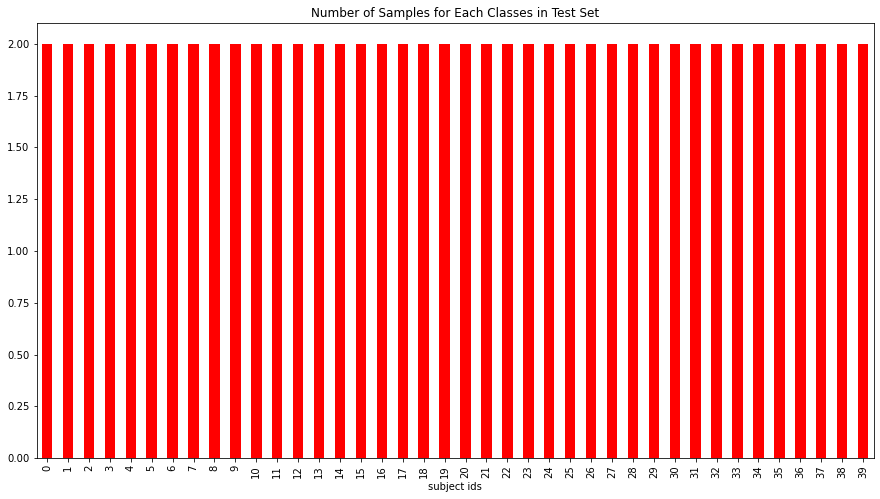

In [12]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes in Test Set", color="red")
plt.show()

### PCA

In [13]:
from sklearn.decomposition import PCA

Finding Optimum Number of Principle Component

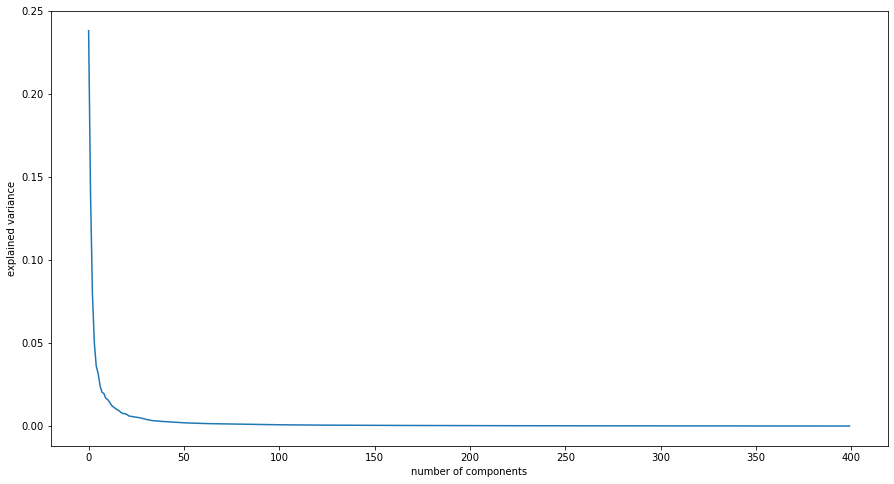

In [14]:
pca = PCA()
pca.fit(data)

plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

X_train_pca shape: (320, 50)
X_test_pca shape: (80, 50)
0.8782855


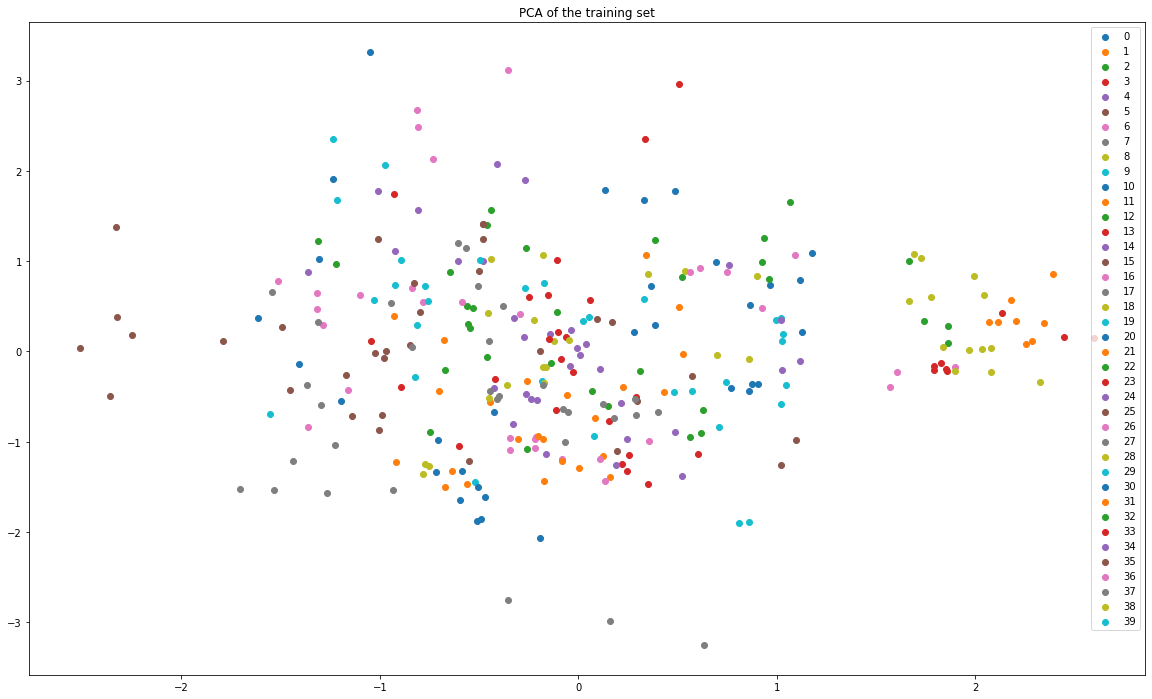

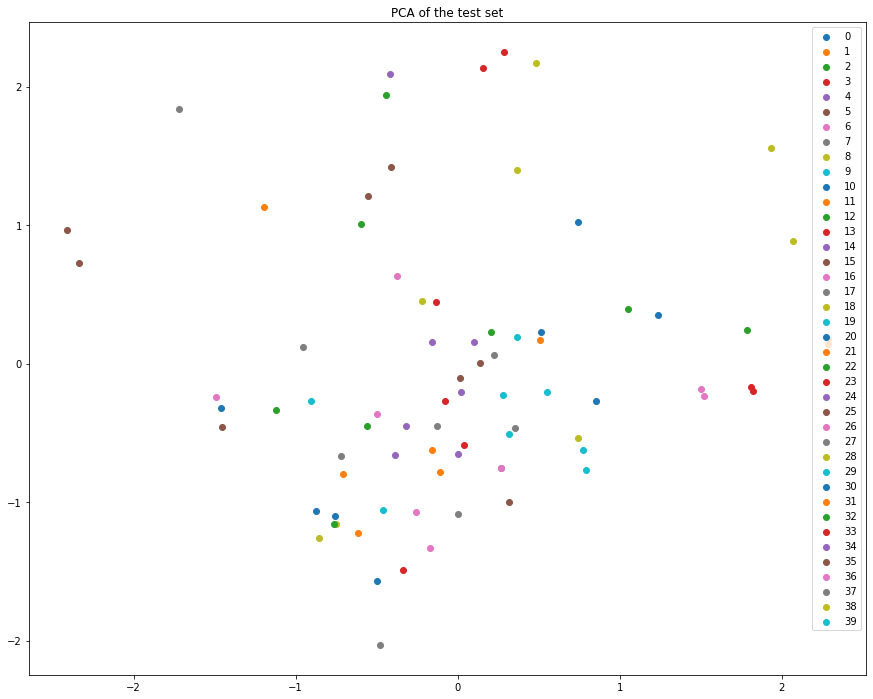

In [19]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(pca.explained_variance_ratio_.sum())


plt.figure(figsize=(20,12))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,12))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)
plt.title("PCA of the test set")
plt.legend()
plt.show()

Show Average Face after PCA

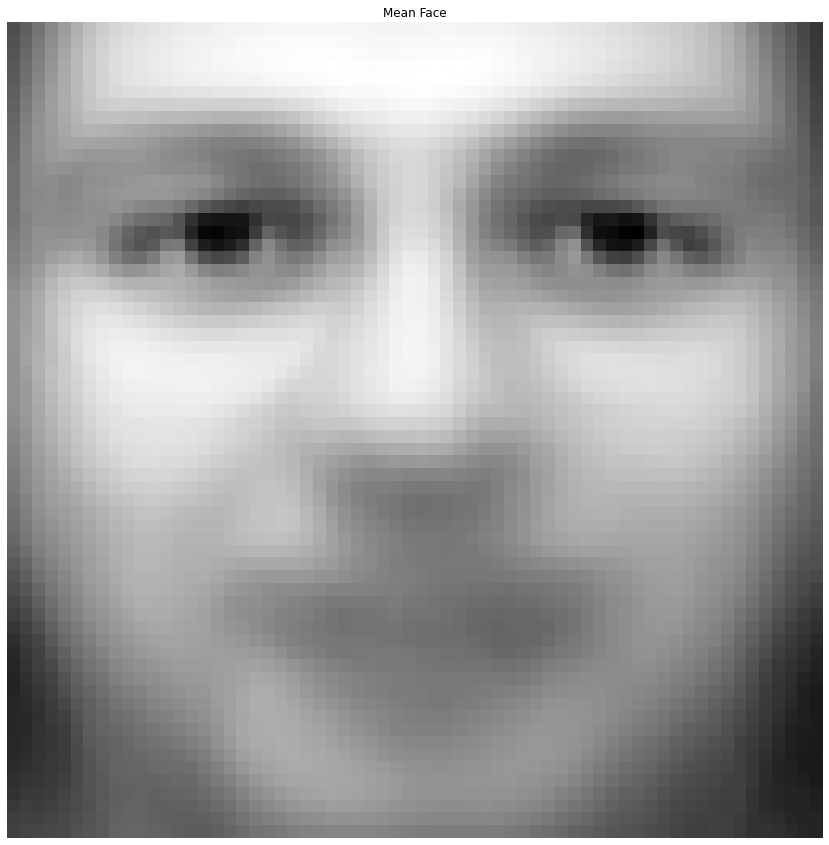

In [20]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title("Mean Face")
ax.axis("off")
plt.show()

Show all faces after PCA

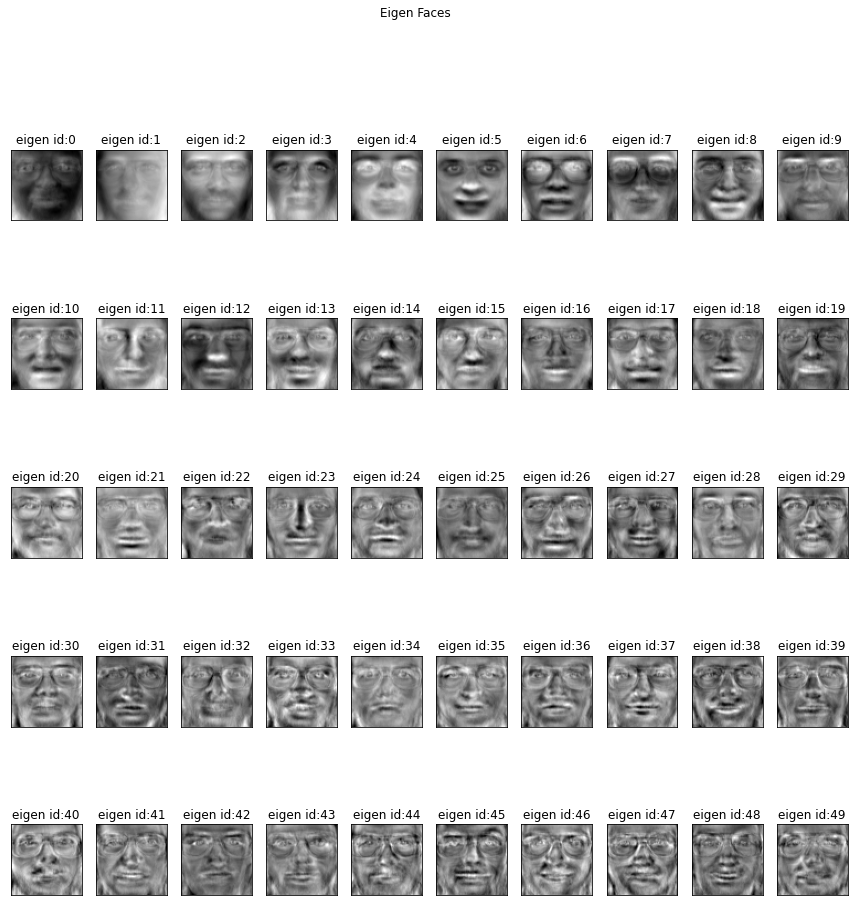

In [21]:
num_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((num_eigenfaces, 64, 64))

cols=10
rows=int(num_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(num_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("Eigen Faces")
plt.show()

### Models

Model training, Model hyper-parameter selection, confusion Matrix

In [22]:
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, classification_report
import seaborn as sns
from prettytable import PrettyTable

def train(model, X_train, X_test, y_train, y_test ):
    print("Training Model: ", model.__class__.__name__)
    model.fit(X_train, np.ravel(y_train))

    #Test Data
    y_pred = model.predict(X_test)
    test_data_acc = accuracy_score(y_test, y_pred)
    print("Accuracy on Test Data: ", test_data_acc)
    cm_test = confusion_matrix(y_test, y_pred)
    
    # Training Data
    y_pred_train = model.predict(X_train)
    train_data_acc = accuracy_score(y_train, y_pred_train)
    print("Accuracy on Train Data: ", train_data_acc)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    # Plot Confusion Matrix for Test and Train Data
    fig, ax=plt.subplots(1, 2, figsize=(15, 8))
    plt1 = sns.heatmap(cm_test, annot=True, fmt='d', ax=ax[0], cmap="Blues")
    plt1.set_title('Confusion matrix - Test data')
    plt1.set_ylabel('Actual label')
    plt1.set_xlabel('Predicted label')
    
    plt2 = sns.heatmap(cm_train, annot=True, fmt='d', ax=ax[1], cmap="Blues")
    plt2.set_title('Confusion matrix - Train data')
    plt2.set_ylabel('Actual label')
    plt2.set_xlabel('Predicted label')
    plt.show()
    
    # Classification Report for Test Data
    table_test = PrettyTable()
    table_test.title = "Classification Report for Test Data"
    table_test.subtitle = "rrr"
    table_test.field_names = ["Accuracy","Precision", "Recall", "F1-Score", "Support"]
    for k,v in classification_report(y_test, model.predict(X_test), output_dict=True).items():
       if k == 'weighted avg':
            table_test.add_row(["{:.3f}".format(test_data_acc), "{:.3f}".format(v['precision']), "{:.3f}".format(v['recall']), "{:.3f}".format(v['f1-score']), "{:.3f}".format(v['support'])])
    print(table_test)
                
    # Classification Report for Train Data
    table_train = PrettyTable()
    table_train.title = "Classification Report for Train Data"
    table_train.field_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Support"]
    for k,v in classification_report(y_train, model.predict(X_train), output_dict=True).items():
        if k == 'weighted avg':
            table_train.add_row(["{:.3f}".format(train_data_acc), "{:.3f}".format(v['precision']), "{:.3f}".format(v['recall']), "{:.3f}".format(v['f1-score']), "{:.3f}".format(v['support'])])
    print(table_train)
    
    print("\n---------------------------------\n---------------------------------\n")
    
def hyper_parameter(hypertuned_model, parameters, X_train, y_train):
    print("Hyper Parameter Tuning for :", hypertuned_model.__class__.__name__)
    model = GridSearchCV(hypertuned_model, parameters, scoring="accuracy")
    model.fit(X_train, np.ravel(y_train))
    print(" Best Params: ", model.best_params_)
    return model.best_params_

def k_fold_cross_validation(model, k , X_train, y_train):
    print("K-Fold Cross Validation for :", model.__class__.__name__)
    kfold = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X_train, np.ravel(y_train), scoring="accuracy", cv=k, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

def validationCurve(parameter_list, parameter_name, X_train, y_train, model):
    print("Validation Curve for :", model.__class__.__name__)
    train_scores, valid_scores = validation_curve(model, X_train, np.ravel(y_train), param_name = parameter_name, param_range = parameter_list, cv=5, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)

    plt.plot(parameter_list, train_scores_mean, label = "Train", color = 'b')
    plt.plot(parameter_list, test_scores_mean, label = "Cross Validation", color = 'r')
    plt.title("Validation Curve")
    plt.xlabel(parameter_name)
    plt.ylabel("Score")
    plt.legend()
    plt.show()

#### Logistic Regression

Logistic Regression - Base Model
Training Model:  LogisticRegression
Accuracy on Test Data:  0.9875
Accuracy on Train Data:  1.0


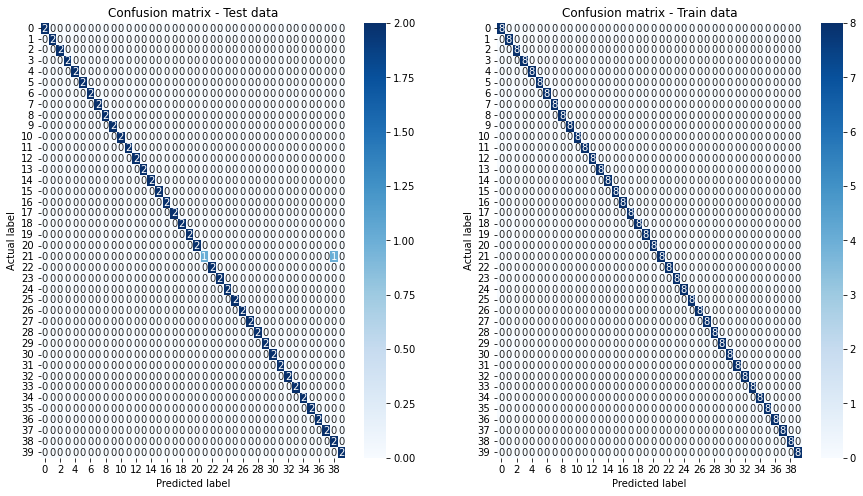

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.988   |   0.992   | 0.988  |  0.987   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Hyper Parameter Tuning for : LogisticRegression
 Best Params:  {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': '

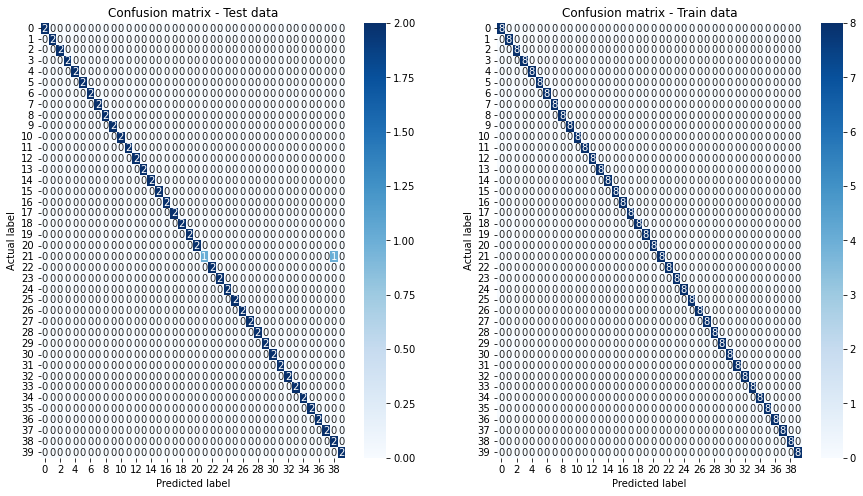

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.988   |   0.992   | 0.988  |  0.987   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

K-Fold Cross Validation for : LogisticRegression
Training Model:  LogisticRegression
Accuracy on Test Data:  0.9875
Accuracy on T

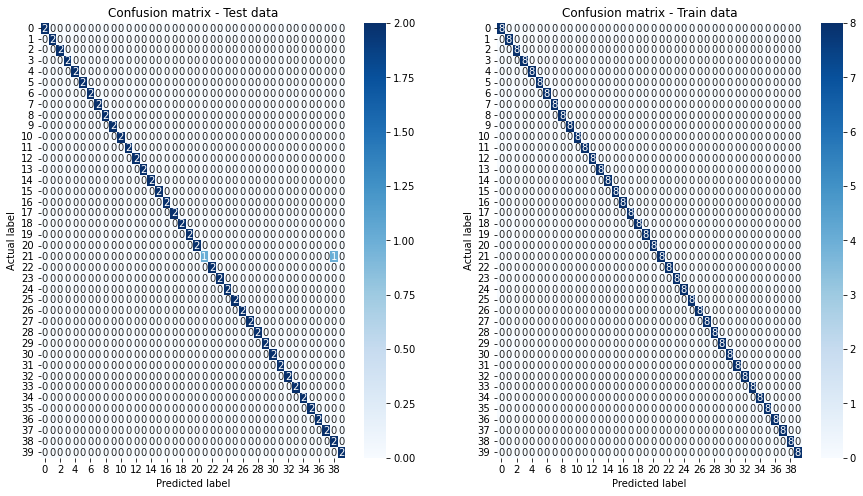

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.988   |   0.992   | 0.988  |  0.987   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Validation Curve for : LogisticRegression


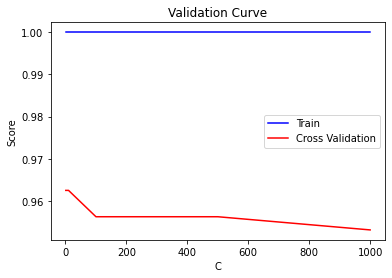

In [163]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()

print("Logistic Regression - Base Model")
train(logisticRegression, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

logisticRegressionHyperTuned = LogisticRegression()
parameters =  [{'solver': ['liblinear'], 'max_iter': [100, 500, 700], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'], 'penalty': ['l1', 'l2']}]
best_params = hyper_parameter(logisticRegressionHyperTuned, parameters, X_train_pca, y_train)
logisticRegressionHyperTuned.set_params(**best_params)
train(logisticRegressionHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

logisticRegressionKfmodel = k_fold_cross_validation(logisticRegressionHyperTuned, 5, X_train_pca, y_train)
train(logisticRegressionKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([1, 10, 100, 500, 1000]), 'C', X_train_pca, y_train, logisticRegressionKfmodel)

#### SVM

SVM - Base Model
Training Model:  SVC
Accuracy on Test Data:  0.9875
Accuracy on Train Data:  1.0


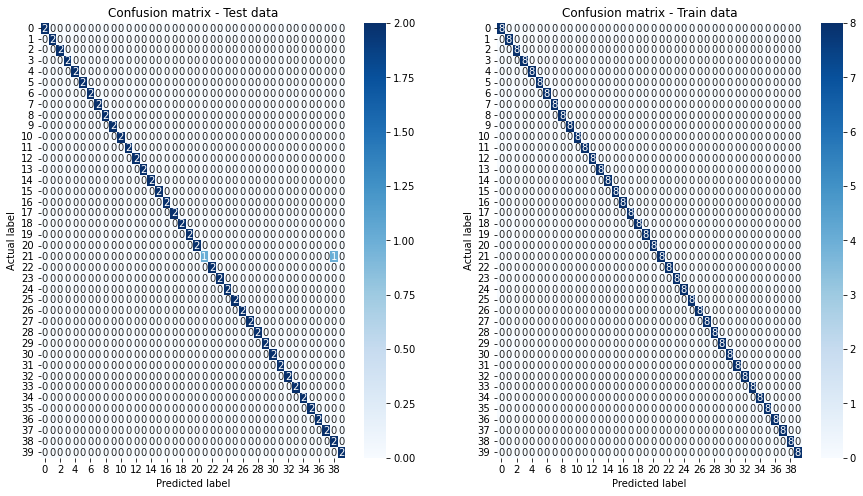

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.988   |   0.992   | 0.988  |  0.987   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Hyper Parameter Tuning for : SVC
 Best Params:  {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Training Mo

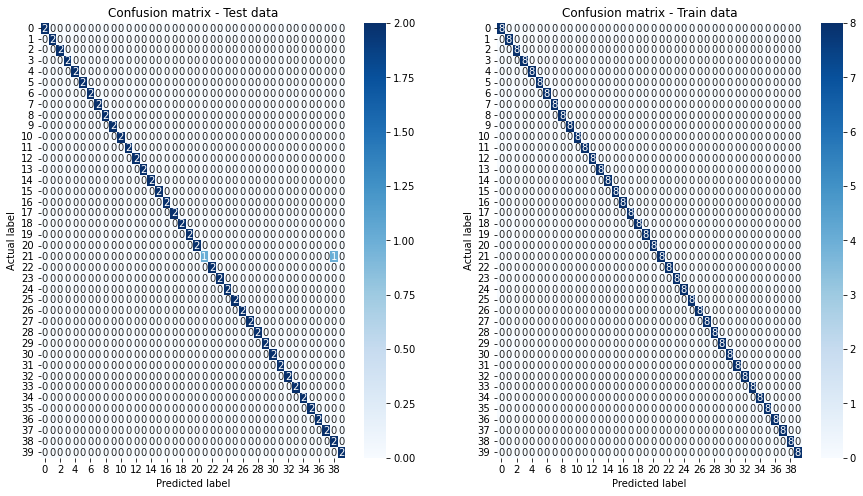

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.988   |   0.992   | 0.988  |  0.987   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

K-Fold Cross Validation for : SVC
Training Model:  SVC
Accuracy on Test Data:  0.9875
Accuracy on Train Data:  1.0


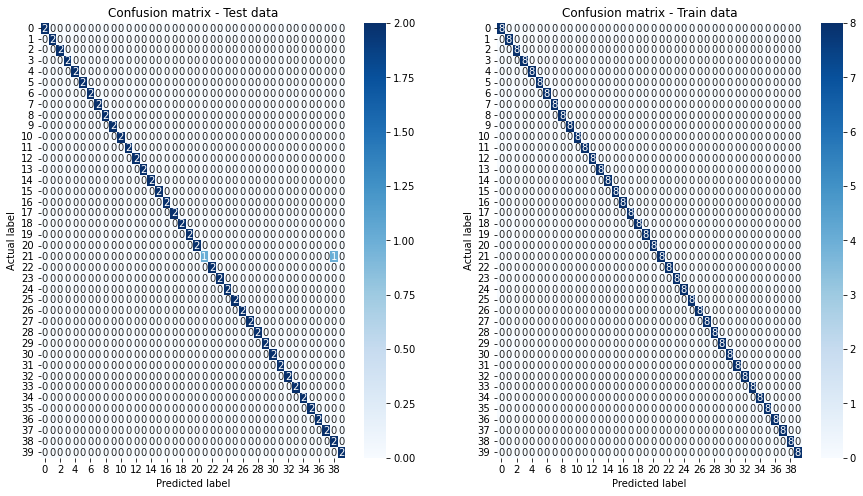

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.988   |   0.992   | 0.988  |  0.987   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Validation Curve for : SVC


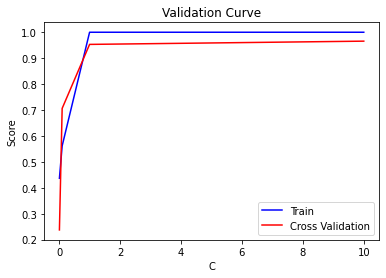

Validation Curve for : SVC


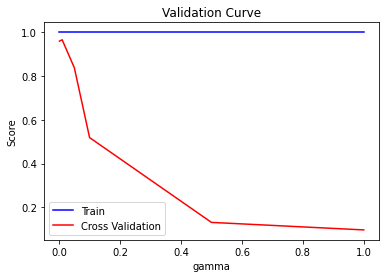

In [164]:
from sklearn.svm import SVC
svc = SVC()

print("SVM - Base Model")
train(svc, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

svcHyperTuned = SVC()
parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1], 'C': [0.01, 0.1, 1, 10, 50, 75, 100, 250, 500, 750, 1000], 'class_weight': ['balanced']}]
best_params = hyper_parameter(svcHyperTuned, parameters, X_train_pca, y_train)
svcHyperTuned.set_params(**best_params)
train(svcHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

svcKfmodel = k_fold_cross_validation(svcHyperTuned, 5, X_train_pca, y_train)
train(svcKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([0.01, 0.1, 1, 10]), "C", X_train_pca, y_train, svcKfmodel)
validationCurve(np.array([0.001, 0.01, 0.05, 0.1, 0.5, 1]), "gamma", X_train_pca, y_train, svcKfmodel)

#### Gaussian Naive Bayes

Gaussian Naive Bayes - Base Model
Training Model:  GaussianNB
Accuracy on Test Data:  0.8625
Accuracy on Train Data:  1.0


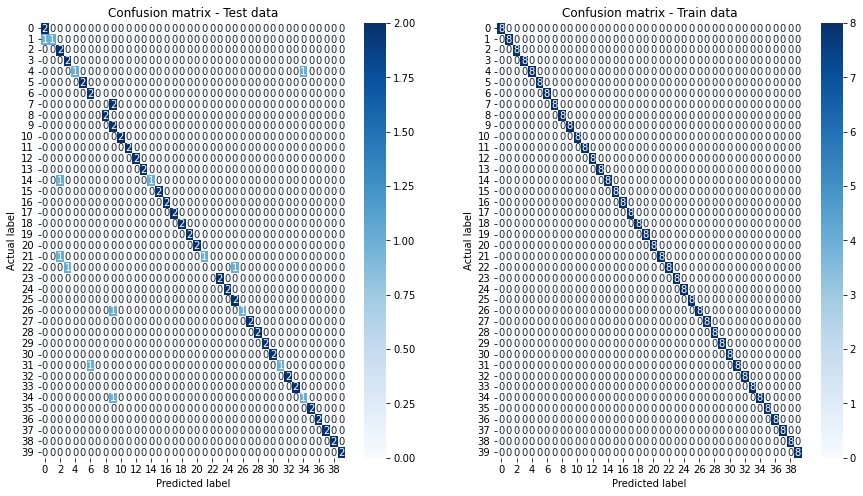

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.863   |   0.875   | 0.863  |  0.847   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Hyper Parameter Tuning for : GaussianNB
 Best Params:  {'var_smoothing': 0.23101297000831597}
Training Model:  GaussianNB
Accurac

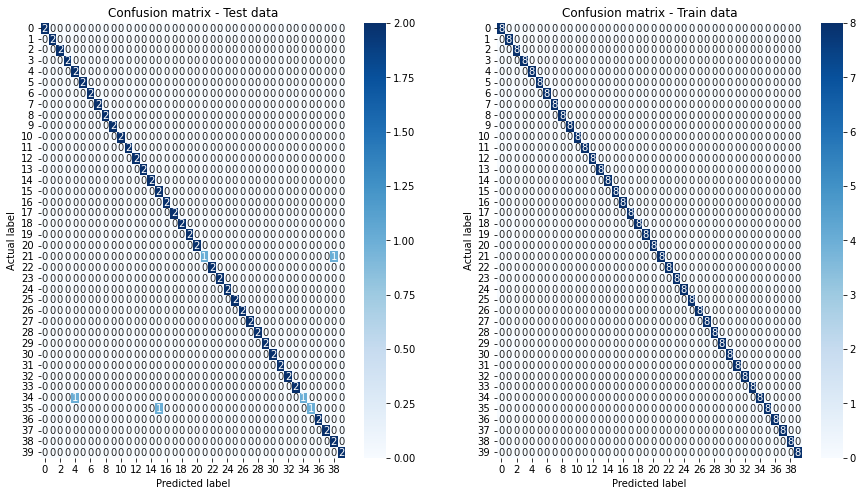

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.963   |   0.975   | 0.963  |  0.960   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

K-Fold Cross Validation for : GaussianNB
Training Model:  GaussianNB
Accuracy on Test Data:  0.9625
Accuracy on Train Data:  1.0


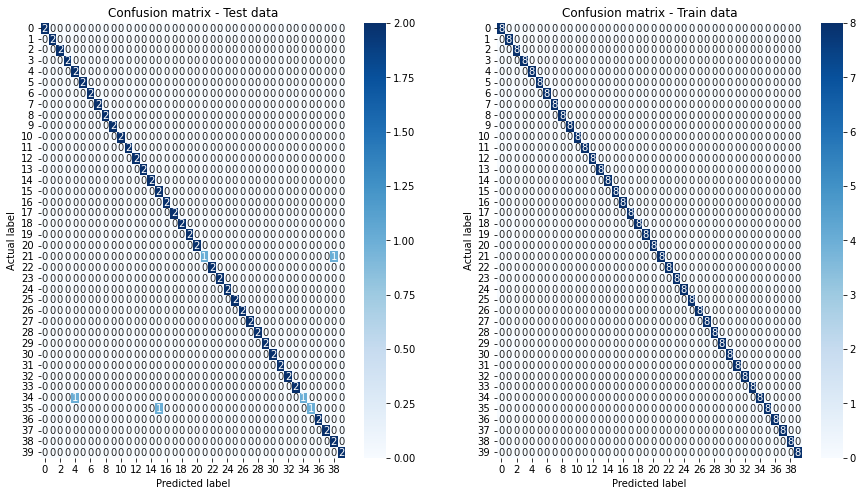

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.963   |   0.975   | 0.963  |  0.960   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Validation Curve for : GaussianNB


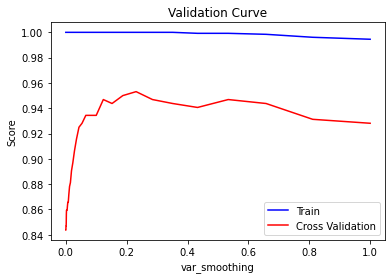

In [165]:
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()

print("Gaussian Naive Bayes - Base Model")
train(gaussianNB, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

gaussianNBHyperTuned = GaussianNB()
parameters = [{'var_smoothing': np.logspace(0,-9, num=100)}]
best_params = hyper_parameter(gaussianNBHyperTuned, parameters, X_train_pca, y_train)
gaussianNBHyperTuned.set_params(**best_params)
train(gaussianNBHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

gaussianNBKfmodel = k_fold_cross_validation(gaussianNBHyperTuned, 5, X_train_pca, y_train)
train(gaussianNBKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.logspace(0,-9, num=100), "var_smoothing", X_train_pca, y_train, gaussianNBKfmodel)

#### Decision Tree

Decision Tree Classifier - Base Model
Training Model:  DecisionTreeClassifier
Accuracy on Test Data:  0.55
Accuracy on Train Data:  1.0


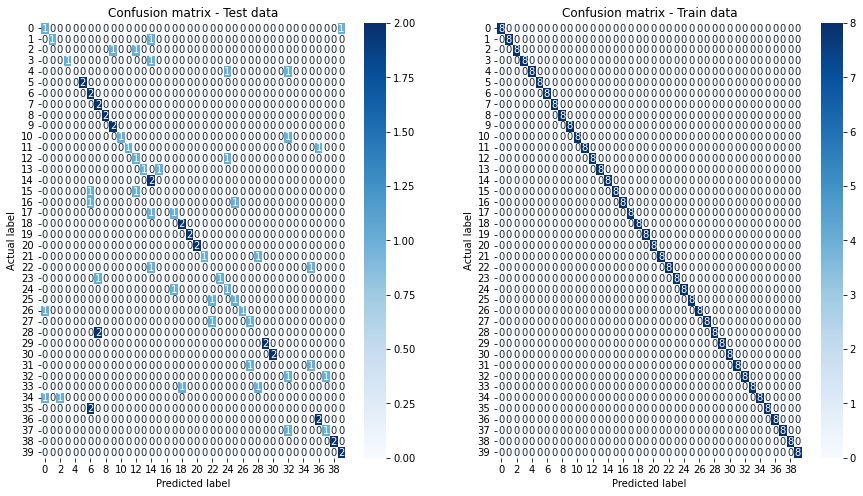

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.550   |   0.550   | 0.550  |  0.516   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Hyper Parameter Tuning for : DecisionTreeClassifier
 Best Params:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 

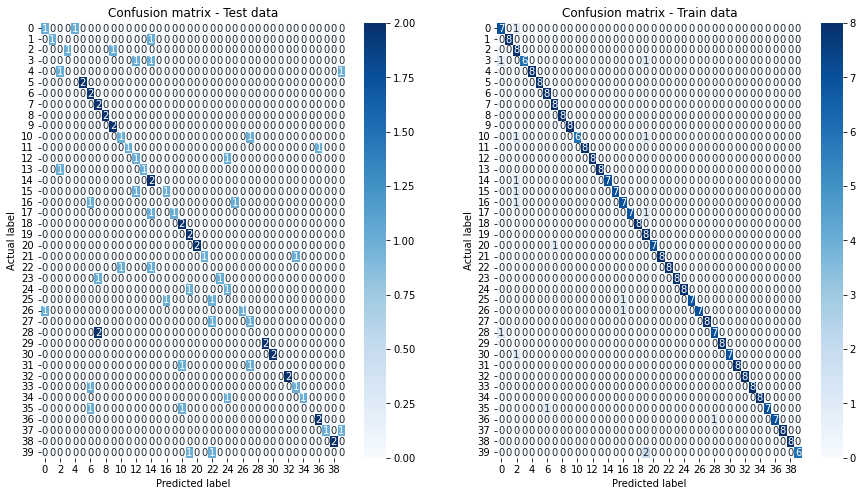

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.537   |   0.549   | 0.537  |  0.507   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.944   |   0.960   | 0.944  |  0.947   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

K-Fold Cross Validation for : DecisionTreeClassifier
Training Model:  DecisionTreeClassifier
Accuracy on Test Data:  0.4875
Accur

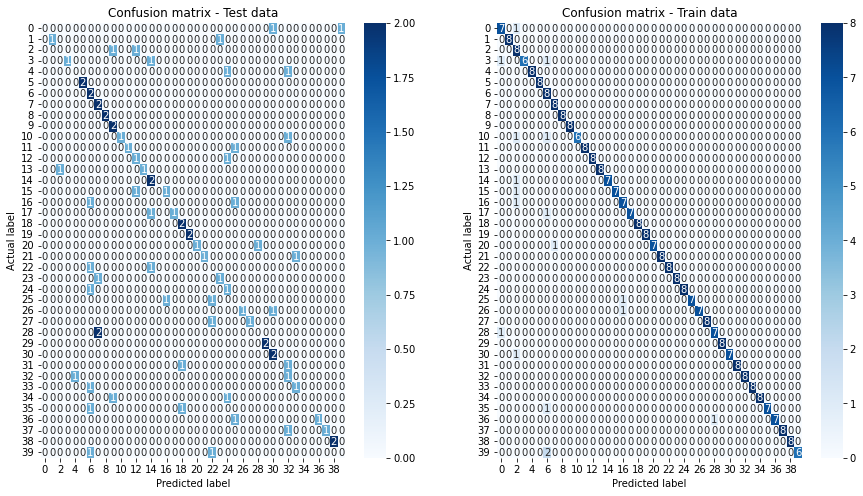

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.487   |   0.533   | 0.487  |  0.464   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.944   |   0.962   | 0.944  |  0.947   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Validation Curve for : DecisionTreeClassifier


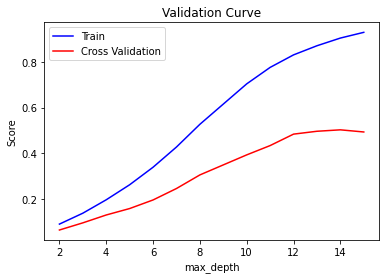

Validation Curve for : DecisionTreeClassifier


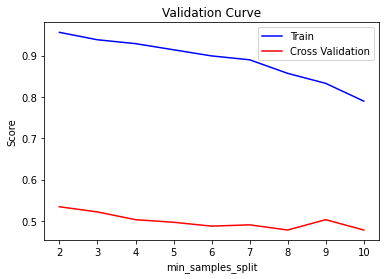

Validation Curve for : DecisionTreeClassifier


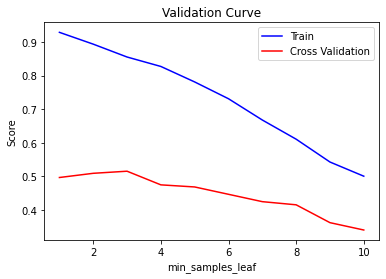

In [166]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

print("Decision Tree Classifier - Base Model")
train(dtc, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

dtcHyperTuned = DecisionTreeClassifier()
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
best_parameters = hyper_parameter(dtcHyperTuned, parameters, X_train_pca, y_train)
dtcHyperTuned.set_params(**best_parameters)
train(dtcHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

dtcKfmodel = k_fold_cross_validation(dtcHyperTuned, 5, X_train_pca, y_train)
train(dtcKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]), "max_depth", X_train_pca, y_train, dtcKfmodel)
validationCurve(np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]), "min_samples_split", X_train_pca, y_train, dtcKfmodel)
validationCurve(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), "min_samples_leaf", X_train_pca, y_train, dtcKfmodel)

#### k-Nearest Neighbor (k-NN) classifier

KNN - Base Model
Training Model:  KNeighborsClassifier
Accuracy on Test Data:  0.825
Accuracy on Train Data:  0.934375


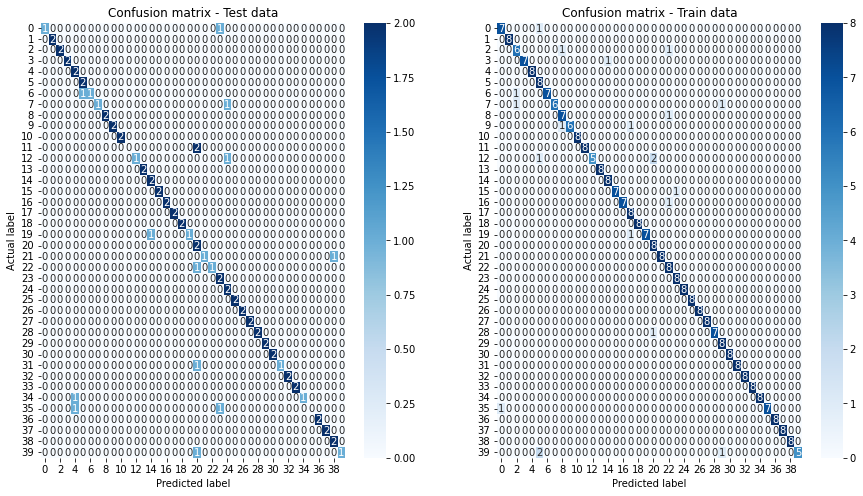

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.825   |   0.870   | 0.825  |  0.813   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.934   |   0.948   | 0.934  |  0.934   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Hyper Parameter Tuning for : KNeighborsClassifier
 Best Params:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
T

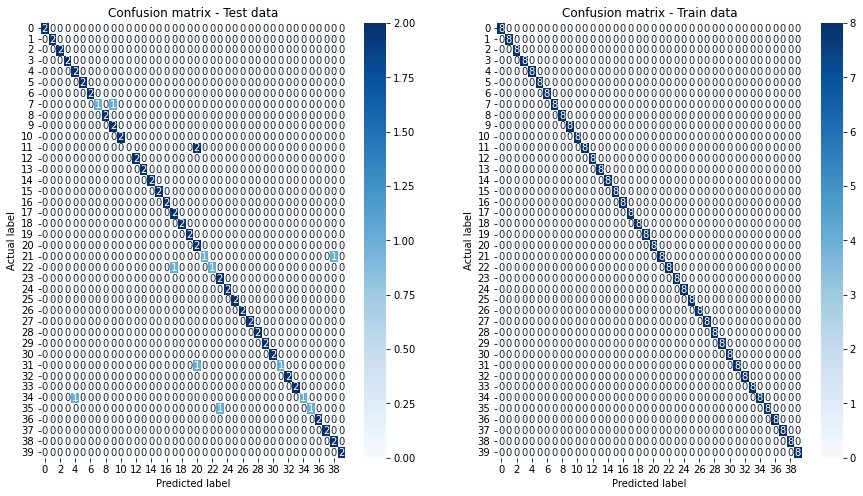

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.900   |   0.918   | 0.900  |  0.889   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

K-Fold Cross Validation for : KNeighborsClassifier
Training Model:  KNeighborsClassifier
Accuracy on Test Data:  0.9
Accuracy on 

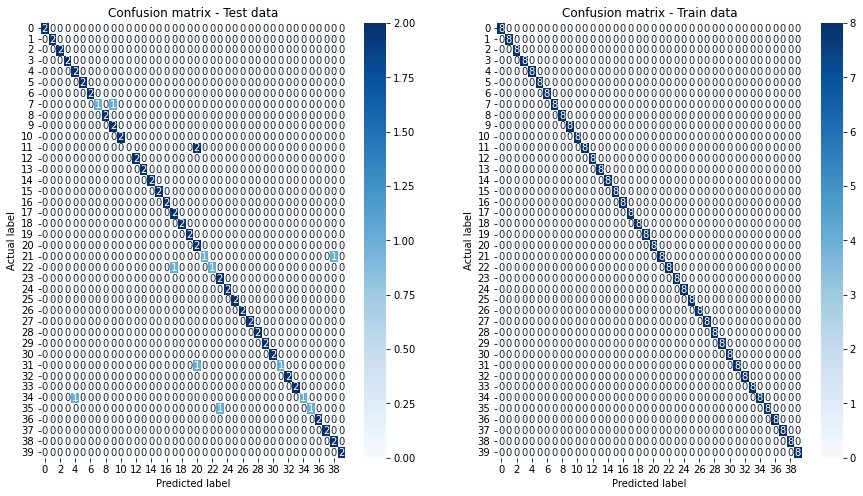

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.900   |   0.918   | 0.900  |  0.889   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Validation Curve for : KNeighborsClassifier


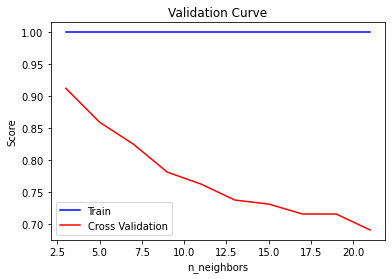

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

print("KNN - Base Model")
train(knn, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

knnHyperTuned = KNeighborsClassifier()
parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
best_parameters = hyper_parameter(knnHyperTuned, parameters, X_train_pca, y_train)
knnHyperTuned.set_params(**best_parameters)
train(knnHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

knnKfmodel = k_fold_cross_validation(knnHyperTuned, 5, X_train_pca, y_train)
train(knnKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21]), "n_neighbors", X_train_pca, y_train, knnKfmodel)

#### Linear Discriminant Analysis

Linear Discriminant Analysis - Base Model
Training Model:  LinearDiscriminantAnalysis
Accuracy on Test Data:  0.95
Accuracy on Train Data:  1.0


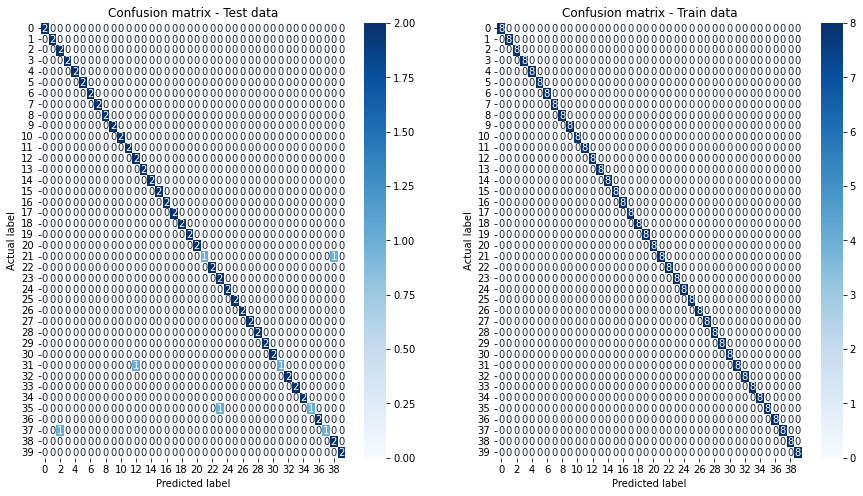

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.950   |   0.967   | 0.950  |  0.947   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Hyper Parameter Tuning for : LinearDiscriminantAnalysis
 Best Params:  {'shrinkage': None, 'solver': 'svd'}
Training Model:  Line

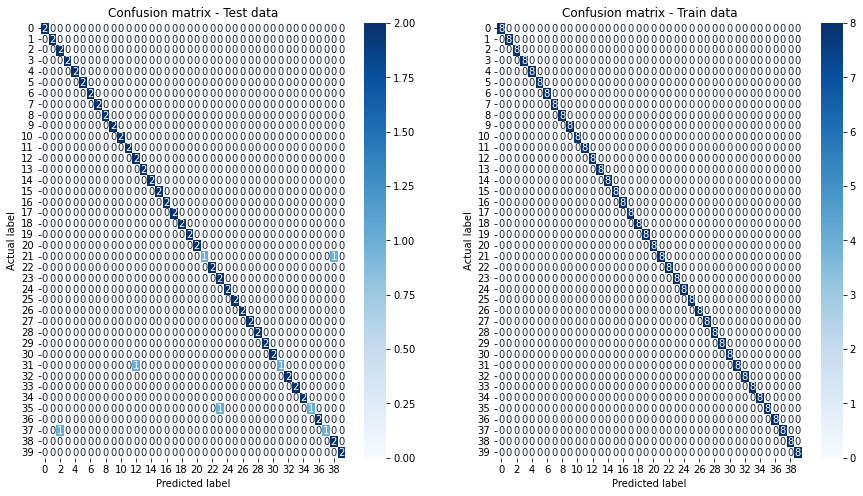

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.950   |   0.967   | 0.950  |  0.947   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

K-Fold Cross Validation for : LinearDiscriminantAnalysis
Training Model:  LinearDiscriminantAnalysis
Accuracy on Test Data:  0.95

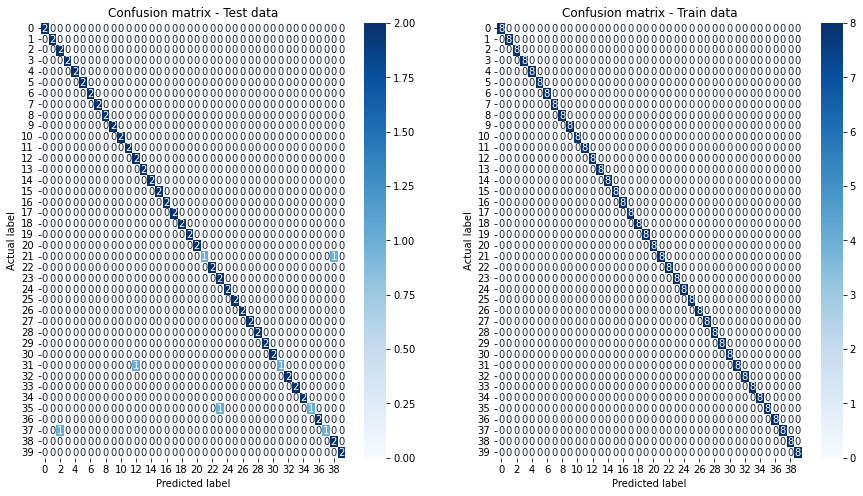

+----------------------------------------------------+
|        Classification Report for Test Data         |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  0.950   |   0.967   | 0.950  |  0.947   |  80.000 |
+----------+-----------+--------+----------+---------+
+----------------------------------------------------+
|        Classification Report for Train Data        |
+----------+-----------+--------+----------+---------+
| Accuracy | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
|  1.000   |   1.000   | 1.000  |  1.000   | 320.000 |
+----------+-----------+--------+----------+---------+

---------------------------------
---------------------------------

#############################

Validation Curve for : LinearDiscriminantAnalysis


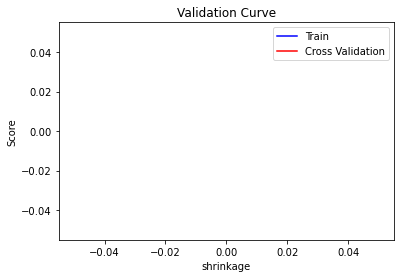

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

print("Linear Discriminant Analysis - Base Model")
train(lda, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

ldsHyperTuned = LinearDiscriminantAnalysis()
parameters = {'solver':('svd', 'lsqr', 'eigen'), 'shrinkage':[None, 'auto']}
best_lds_params = hyper_parameter(ldsHyperTuned, parameters, X_train_pca, y_train)
ldsHyperTuned.set_params(**best_lds_params)
train(ldsHyperTuned, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

ldaKfmodel = k_fold_cross_validation(ldsHyperTuned, 5, X_train_pca, y_train)
train(ldaKfmodel, X_train_pca, X_test_pca, y_train, y_test)
print('#############################\n')

validationCurve(np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]), "shrinkage", X_train_pca, y_train, ldaKfmodel)

### Deep Learning

Reshape for CNN

In [169]:
x_train = X_train.reshape(-1,64,64,1)
x_test = X_test.reshape(-1,64,64,1)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (320, 64, 64, 1)
x_test shape:  (80, 64, 64, 1)


Label Encoding

In [170]:
from keras.utils.np_utils import to_categorical

y_train_ = to_categorical(y_train, num_classes = 40)
y_test_ = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)

y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)


In [171]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

In [172]:
import pydot
from keras.utils import plot_model
model.summary()

plot_model(model, to_file='CNNModel.png')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 20)        520       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 20)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 32, 32, 20)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 50)        36050     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 50)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 16, 16, 50)       

In [173]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [174]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.7,min_lr=0.00000000001)

epoch = 50
batch_size = 50

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=5,  
        zoom_range = 0.05, 
        width_shift_range=0,  
        height_shift_range=0, 
        horizontal_flip=False,
        vertical_flip=False)  
datagen.fit(x_train)

history = model.fit(
        datagen.flow(x_train,y_train_, batch_size=batch_size),
        epochs = epoch, 
        validation_data = (x_test,y_test_),
        verbose = 2, 
        steps_per_epoch=x_train.shape[0] // batch_size,
        callbacks=[learning_rate_reduction])

Epoch 1/50
6/6 - 6s - loss: 5.6136 - accuracy: 0.0222 - val_loss: 3.6883 - val_accuracy: 0.0250 - lr: 0.0010 - 6s/epoch - 926ms/step
Epoch 2/50
6/6 - 3s - loss: 3.6964 - accuracy: 0.0296 - val_loss: 3.6877 - val_accuracy: 0.0250 - lr: 0.0010 - 3s/epoch - 570ms/step
Epoch 3/50
6/6 - 3s - loss: 3.6889 - accuracy: 0.0333 - val_loss: 3.6874 - val_accuracy: 0.0250 - lr: 0.0010 - 3s/epoch - 525ms/step
Epoch 4/50

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
6/6 - 4s - loss: 3.6883 - accuracy: 0.0222 - val_loss: 3.6861 - val_accuracy: 0.0250 - lr: 0.0010 - 4s/epoch - 584ms/step
Epoch 5/50
6/6 - 3s - loss: 3.6842 - accuracy: 0.0296 - val_loss: 3.6836 - val_accuracy: 0.0250 - lr: 7.0000e-04 - 3s/epoch - 579ms/step
Epoch 6/50
6/6 - 3s - loss: 3.6820 - accuracy: 0.0333 - val_loss: 3.6827 - val_accuracy: 0.0500 - lr: 7.0000e-04 - 3s/epoch - 573ms/step
Epoch 7/50
6/6 - 3s - loss: 3.6825 - accuracy: 0.0407 - val_loss: 3.6812 - val_accuracy: 0.0250 - lr: 7.0000e-04 - 3s

10/10 [==============================] - 0s 38ms/step - loss: 0.0015 - accuracy: 1.0000
Test accuracy, on train data: 1.0
Test loss, on train data: 0.0015416661044582725
3/3 [==============================] - 0s 31ms/step - loss: 0.0664 - accuracy: 0.9875
Test accuracy, on test data: 0.987500011920929
Test loss, on test data: 0.06635953485965729


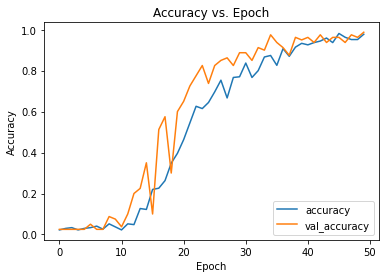

In [175]:
#Test the model on train data  
test_loss, test_acc = model.evaluate(x=x_train, y=y_train_)
print('Test accuracy, on train data:', test_acc)
print('Test loss, on train data:', test_loss)

#Test the model on test data  
test_loss, test_acc = model.evaluate(x=x_test, y=y_test_)
print('Test accuracy, on test data:', test_acc)
print('Test loss, on test data:', test_loss)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend(loc='lower right')
plt.show()
